In [3]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#cambiar el directorio de trabajo actual
os.chdir('/content/drive/MyDrive/datos')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('WineQT.csv')

In [16]:
# Preprocesamiento de datos

# Rellenar los datos faltantes (Numéricos)
medias = df[['fixed acidity',
             'volatile acidity',
             'citric acid',
             'residual sugar',
             'chlorides',
             'free sulfur dioxide',
             'total sulfur dioxide',
             'density',
             'pH',
             'sulphates',
             'alcohol']].mean()

df.loc[pd.isna(df["fixed acidity"]),'fixed acidity'] = medias['fixed acidity']
df.loc[pd.isna(df["volatile acidity"]),'volatile acidity'] = medias['volatile acidity']
df.loc[pd.isna(df["citric acid"]),'citric acid'] = medias['citric acid']
df.loc[pd.isna(df["residual sugar"]),'residual sugar'] = medias['residual sugar']
df.loc[pd.isna(df["chlorides"]),'chlorides'] = medias['chlorides']
df.loc[pd.isna(df["free sulfur dioxide"]),'free sulfur dioxide'] = medias['free sulfur dioxide']
df.loc[pd.isna(df["total sulfur dioxide"]),'total sulfur dioxide'] = medias['total sulfur dioxide']
df.loc[pd.isna(df["density"]),'density'] = medias['density']
df.loc[pd.isna(df["pH"]),'pH'] = medias['pH']
df.loc[pd.isna(df["sulphates"]),'sulphates'] = medias['sulphates']
df.loc[pd.isna(df["alcohol"]),'alcohol'] = medias['alcohol']

# Proceso de estandarización
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid',
                                                              'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                              'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                                              'alcohol']])

# Modelo con Regresión Logística

X = df[['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']]

y = df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Creación de la regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, penalty='l2', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f'Precisión sin PCA: {model.score(X_test, y_test)}')

# Aplicación de Componentes Principales PCA

from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, penalty='l2', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'PCA con n = 10: {model.score(X_test, y_test)}')

pca = decomposition.PCA(n_components=11)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, penalty='l2', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'PCA con n = 11: {model.score(X_test, y_test)}')

pca = decomposition.PCA(n_components=9)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, penalty='l2', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'PCA con n = 9: {model.score(X_test, y_test)}')

pca = decomposition.PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, penalty='l2', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'PCA con n = 5: {model.score(X_test, y_test)}')

pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, penalty='l2', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'PCA con n = 3: {model.score(X_test, y_test)}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Precisión sin PCA: 0.62882096069869
PCA con n = 10: 0.6157205240174672
PCA con n = 11: 0.62882096069869
PCA con n = 9: 0.6069868995633187
PCA con n = 5: 0.6069868995633187
PCA con n = 3: 0.5895196506550219


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("WineQT.csv")

# Eliminar columnas innecesarias si están presentes
df = df.drop(columns=["Id", "quality"], errors="ignore")

# Escalar las características numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


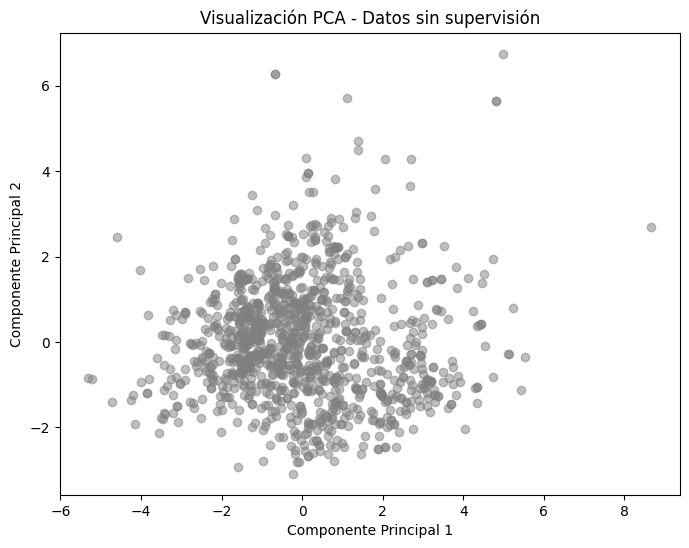

In [25]:
# Reducción de dimensionalidad con PCA
# Aplicar PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualización de los datos en 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5, c='gray')
plt.title("Visualización PCA - Datos sin supervisión")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

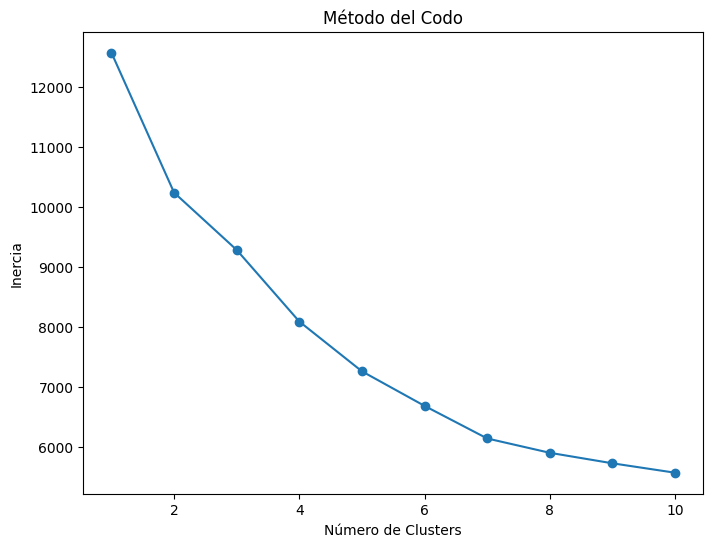

In [24]:
# a. Método del Codo
# Método del codo para determinar el número óptimo de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()

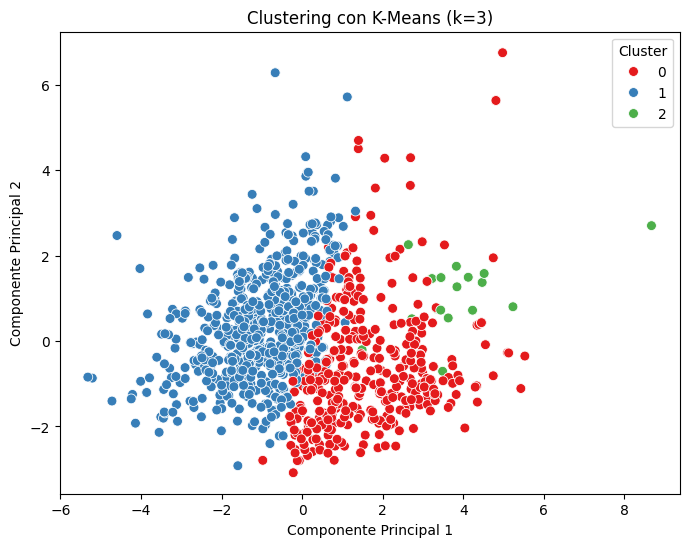

In [23]:
# b. Aplicar K-Means con k óptimo
# Elegir un número de clusters (por ejemplo, 3 basados en el codo)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Agregar etiquetas de cluster al dataset
df["Cluster"] = clusters

# Visualización de los clusters en el espacio PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="Set1", s=50)
plt.title("Clustering con K-Means (k=3)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             9.962750          0.408988     0.461900        2.906750   
1             7.394061          0.598833     0.153881        2.338329   
2             8.484211          0.535263     0.556316        2.031579   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.086140            13.165000             38.180000  0.997741   
1         0.079854            16.962017             49.713398  0.996163   
2         0.373368            15.894737             64.000000  0.997088   

               pH  sulphates    alcohol  
Cluster                                  
0        3.212025   0.723025  10.704917  
1        3.372983   0.605304  10.323297  
2        3.033684   1.279474   9.436842  


<ipython-input-22-868e15ba2e65>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y="alcohol", palette="Set1")


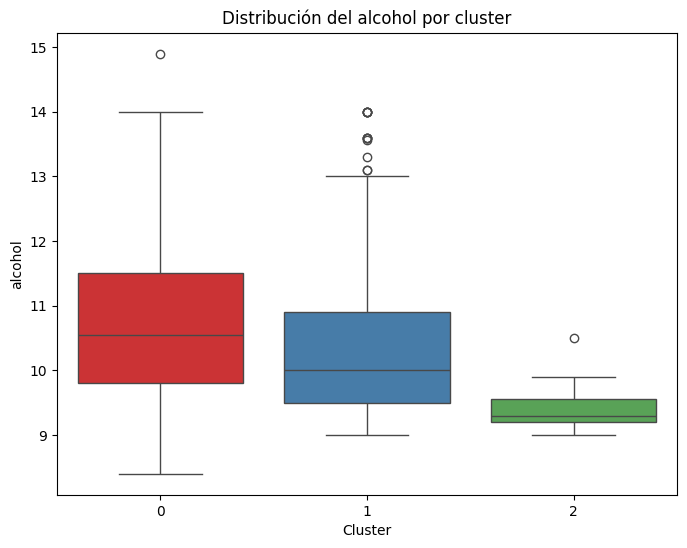

In [22]:
# Análisis de los resultados
# Resumen estadístico por cluster
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

# Visualizar la distribución de alguna variable por cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Cluster", y="alcohol", palette="Set1")
plt.title("Distribución del alcohol por cluster")
plt.show()
